In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#1. Import and Transform

###Import

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exploratory Analyses

In [ ]:
for var in df.columns:
 print(f'{df[var].describe()}')

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64
count      891
unique       2
top       male
freq       577
Name: sex, dtype: object
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
N

In [ ]:
def descriptive(df_, var, target='survived', max_classes=5):
  df=df_.copy()

  if df[var].nunique() > max_classes:
    df[var] = pd.qcut(df[var], q=max_classes, duplicates='drop')

  fig, ax1 = plt.subplots(figsize=(10, 6))

  sns.pointplot(data=df, y=target, x=var, ax=ax1)

  ax2= ax1.twinx()
  sns.countplot(data=df, x=var, palette= 'viridis', alpha=0.5, ax=ax2)
  ax2.set_ylabel('Frequency', color='blue')
  ax2.tick_params(axis='y', labelcolor='blue')

  ax1.set_zorder(2)
  ax1.patch.set_visible(False)

  plt.show()

<ipython-input-5-7bc7f0d5b3d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette= 'viridis', alpha=0.5, ax=ax2)


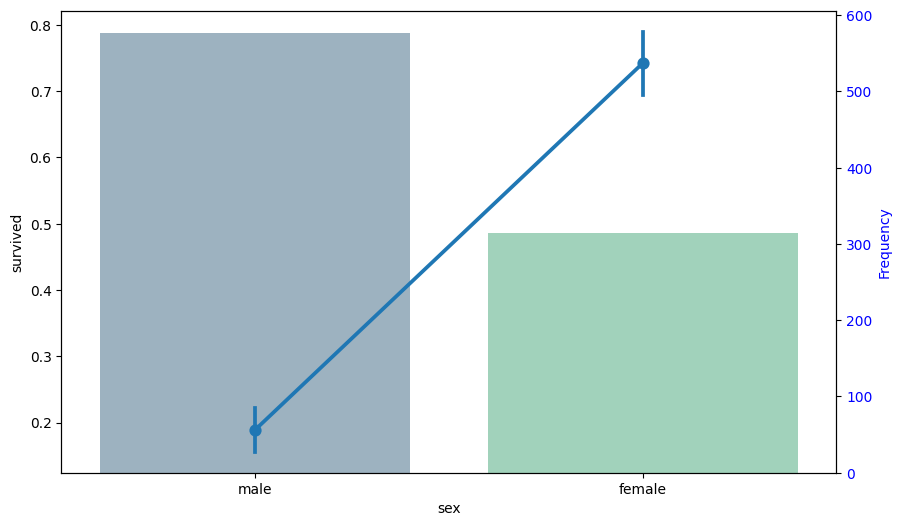

<ipython-input-5-7bc7f0d5b3d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette= 'viridis', alpha=0.5, ax=ax2)


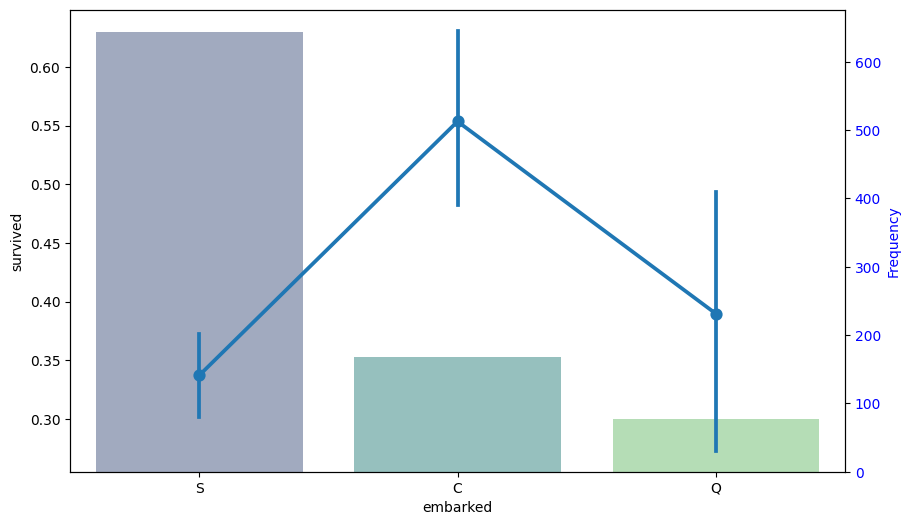

<ipython-input-5-7bc7f0d5b3d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette= 'viridis', alpha=0.5, ax=ax2)


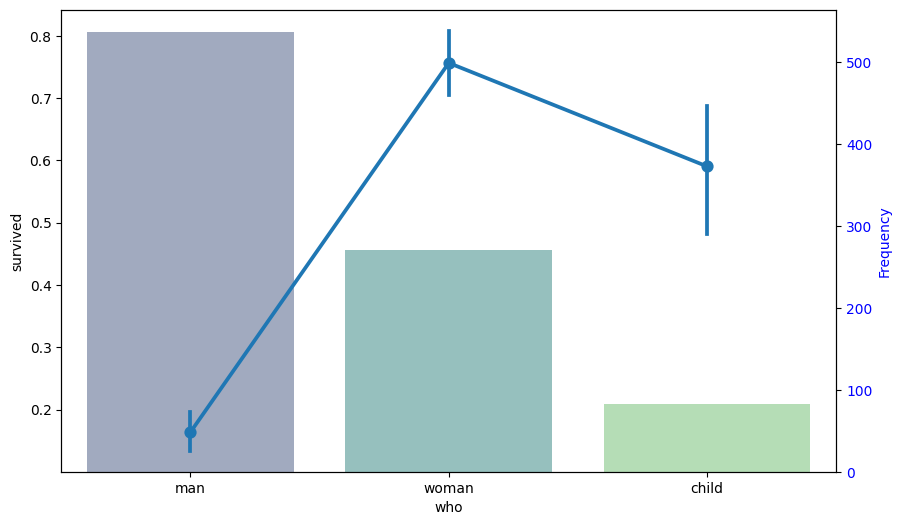

<ipython-input-5-7bc7f0d5b3d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette= 'viridis', alpha=0.5, ax=ax2)


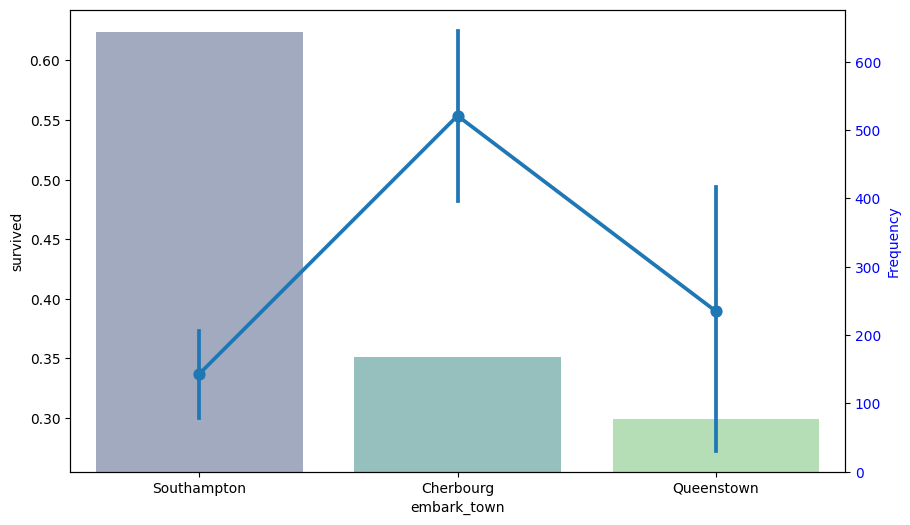

<ipython-input-5-7bc7f0d5b3d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette= 'viridis', alpha=0.5, ax=ax2)


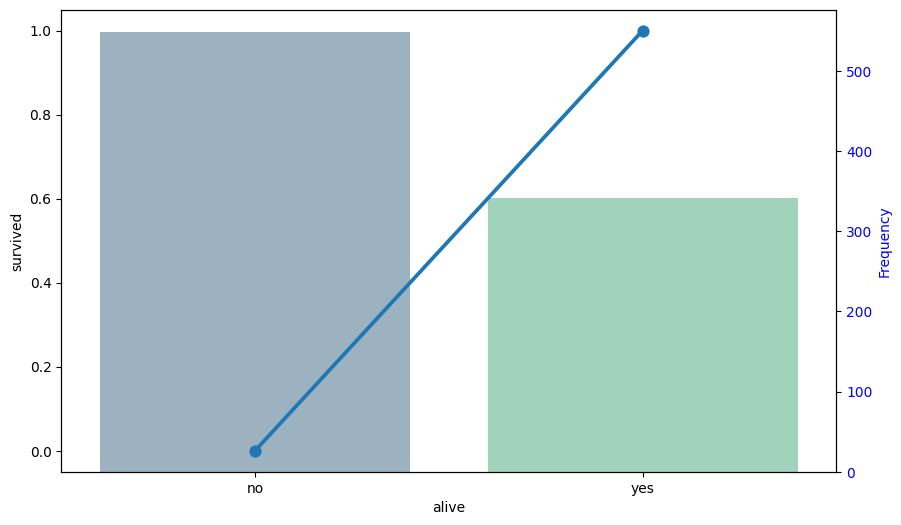

In [ ]:
for var in df.columns:
  if df[var].dtype == 'object':
    descriptive(df, var)

### Transform

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
df['embarked'].fillna('S', inplace=True)

<ipython-input-9-69e5f3b604fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna('S', inplace=True)


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
for var in df.columns:
  if df[var].dtype in ['int64', 'float64']:
    df[var].fillna(df[var].mean(), inplace=True)

<ipython-input-11-2cdab0b506e4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(df[var].mean(), inplace=True)


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town',
                      'alive', 'alone'],inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
df_dummies.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


#2. Basic Tree

In [ ]:
X = df_dummies.drop(columns='survived')
y = df_dummies['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=3,random_state=42)

In [ ]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
report  = classification_report(y_test, clf1.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf2 = RandomForestClassifier(random_state=42)
param_dist = {'n_estimators': [10, 50, 100, 200],
              'max_depth': range(2,30,1),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'ccp_alpha': np.linspace(0.0, 0.05, 20)}
random_sarch = RandomizedSearchCV(
                                  estimator=clf2,
                                  param_distributions=param_dist,
                                  n_iter=50,
                                  cv=cv,
                                  scoring= 'roc_auc',
                                  n_jobs=-1,
                                  verbose=1,

                                  )

In [ ]:
random_sarch.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0.        , 0.00263158, 0.00526316, 0.00789474, 0.01052632,
       0.01315789, 0.01578947, 0.01842105, 0.02105263, 0.02368421,
       0.02631579, 0.02894737, 0.03157895, 0.03421053, 0.03684211,
       0.03947368, 0.04210526, 0.04473684, 0.04736842, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='roc_auc', verbose=1)

In [ ]:
final_random_forest = random_sarch.best_estimator_

In [ ]:
random_sarch.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 6,
 'criterion': 'entropy',
 'ccp_alpha': np.float64(0.0),
 'bootstrap': False}

In [ ]:
prob_pred = final_random_forest.predict_proba(X_test)[:,1]

In [ ]:
prob_pred

array([0.24740199, 0.18117744, 0.14653502, 0.89786248, 0.59699618,
       0.91913999, 0.64402772, 0.11976688, 0.66614362, 0.83777355,
       0.39264954, 0.12471211, 0.17949281, 0.15010282, 0.18117744,
       0.85704485, 0.38547563, 0.64402772, 0.17926006, 0.30682583,
       0.12518406, 0.34142721, 0.39261093, 0.13521745, 0.15711702,
       0.10115806, 0.29876379, 0.18117744, 0.28342759, 0.46331415,
       0.12518406, 0.44252395, 0.3733397 , 0.52317077, 0.13090373,
       0.25459952, 0.31441705, 0.64402772, 0.87140368, 0.12377191,
       0.1976038 , 0.12528524, 0.12953179, 0.15587332, 0.48247697,
       0.23180351, 0.13521745, 0.13094395, 0.12687686, 0.39130589,
       0.81163149, 0.93211219, 0.10333369, 0.60579861, 0.07891054,
       0.91002677, 0.18117744, 0.90480967, 0.84137076, 0.59297543,
       0.13238327, 0.88153094, 0.82881804, 0.17968544, 0.15587332,
       0.82251612, 0.25436561, 0.12499743, 0.26147057, 0.95158981,
       0.83591822, 0.8943657 , 0.35636891, 0.94610615, 0.12943

In [ ]:
random_score = final_random_forest.score(X_test, y_test)
random_roc = roc_auc_score(y_test, prob_pred)
random_gini = random_roc*2-1
print(random_score)
print(random_roc)
print(random_gini)

0.8212290502793296
0.8893178893178894
0.7786357786357787


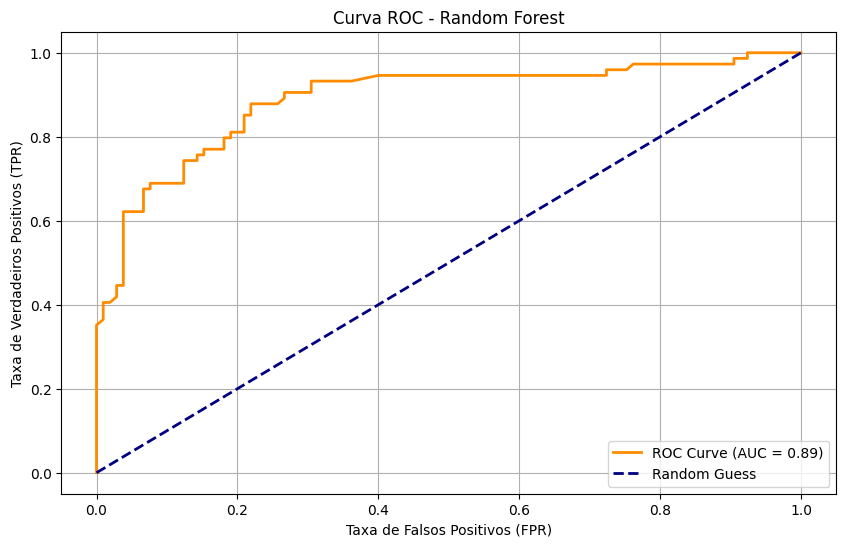

In [ ]:
fpr, tpr, thresholds  = roc_curve(y_test, prob_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#4. XGBoostin

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb = XGBClassifier(random_state=42)

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
pram_dist2 = {'n_estimators': [10, 50, 100, 200],
              'max_depth': range(2,30,1),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'ccp_alpha': np.linspace(0.0, 0.05, 20)}


In [ ]:
random_xgb = RandomizedSearchCV(estimator=xgb,
                                param_distributions=pram_dist2,
                                n_iter=50,
                                cv=kf,
                                scoring= 'roc_auc',
                                n_jobs=-1,
                                verbose=1,

)

In [ ]:
random_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:30:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "ccp_alpha", "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importa...
                                        'ccp_alpha': array([0.        , 0.00263158, 0.00526316, 0.00789474, 0.01052632,
       0.01315789, 0.01578947, 0.01842105, 0.02105263, 0.02368421,
       0.02631579, 0.02894737, 0.03157895, 0.03421053, 0.03684211,
       0.03947368, 0.04210526, 0.04473684, 0.04736842, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='roc_auc', verbose=1)

In [ ]:
random_xgb.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 2,
 'criterion': 'entropy',
 'ccp_alpha': np.float64(0.04473684210526316),
 'bootstrap': False}

In [ ]:
final_xgb = random_xg.best_estimator_

NameError: name 'random_xg' is not defined

In [ ]:
xgb_score = final_xgb.score(X_test, y_test)
xgb_roc = roc_auc_score(y_test, final_xgb.predict_proba(X_test)[:,1])
xgb_gini = random_roc*2-1
print(xgb_score)
print(xgb_roc)
print(xgb_gini)

In [ ]:
print(classification_report(y_test, final_xgb.predict(X_test)))

In [ ]:
fpr, tpr, thresholds  = roc_curve(y_test, final_xgb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - XGBoosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
fpr1, tpr1, thresholds1  = roc_curve(y_test, prob_pred)
fpr2, tpr2, thresholds2  = roc_curve(y_test, final_xgb.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr1, tpr1)
roc_auc_xgb = auc(fpr2, tpr2)

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr2, tpr2, color='forestgreen', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Comparativos de Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#5. LightGBM (with Bayes Search)

In [ ]:
import lightgbm as lgbm
from skopt import BayesSearchCV

In [ ]:
lgbm_clf = lgbm.LGBMClassifier(boosting_type='gbdt',
                                objective='binary',
                               random_state=42)

In [ ]:
param_grid = {
    'num_leaves': (20, 60),  # Número de folhas na árvore de decisão
    'max_depth': (3, 15),  # Profundidade máxima da árvore
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # Taxa de aprendizado
    'n_estimators': (50, 100),  # Número de árvores
    'subsample': (0.5, 1.0),  # Proporção de amostras usadas em cada árvore
    'colsample_bytree': (0.5, 1.0),  # Fração de colunas a serem usadas por árvore
    'reg_alpha': (1e-5, 1.0, 'log-uniform'),  # Regularização L1
    'reg_lambda': (1e-5, 1.0, 'log-uniform'),  # Regularização L2
}

In [ ]:
bayes_search = BayesSearchCV(estimator=lgbm_clf,
                             search_spaces=param_grid,
                             n_iter=50,
                             cv=kf,
                             scoring='roc_auc',
                             n_jobs=-1,
                             verbose=0)

In [ ]:
bayes_search.fit(X_train, y_train)

In [ ]:
bayes_search.best_params_

In [ ]:
bayes_search.best_score_

In [ ]:
final_lgbm = bayes_search.best_estimator_

In [ ]:
print(classification_report(y_test, final_lgbm.predict(X_test)))

In [ ]:
lgbm_score = final_lgbm.score(X_test, y_test)
lgbm_roc = roc_auc_score(y_test, final_lgbm.predict_proba(X_test)[:,1])
lgbm_gini = random_roc*2-1
print(lgbm_score)
print(lgbm_roc)
print(lgbm_gini)

In [ ]:
fpr1, tpr1, thresholds1  = roc_curve(y_test, final_xgb.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2  = roc_curve(y_test, final_lgbm.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr1, tpr1)
roc_auc_lgbm = auc(fpr2, tpr2)

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr2, tpr2, color='forestgreen', lw=2, label=f'ROC Curve (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Comparativos de Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()